# Dynamic ecoregions

## Define inputs

In [1]:
# Inputs

input_file = "data/data-continental-united-states.csv"
# input_file = "data/data-nh-vt.csv"
geocode_precision = 4
# geocode_precision = 5
log_file = "run.log"
num_clusters = 60
taxon_filter = "Insecta"

## Set up logging

In [2]:
import logging

logging.basicConfig(filename=log_file, encoding="utf-8", level=logging.INFO)

## Data flow

/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


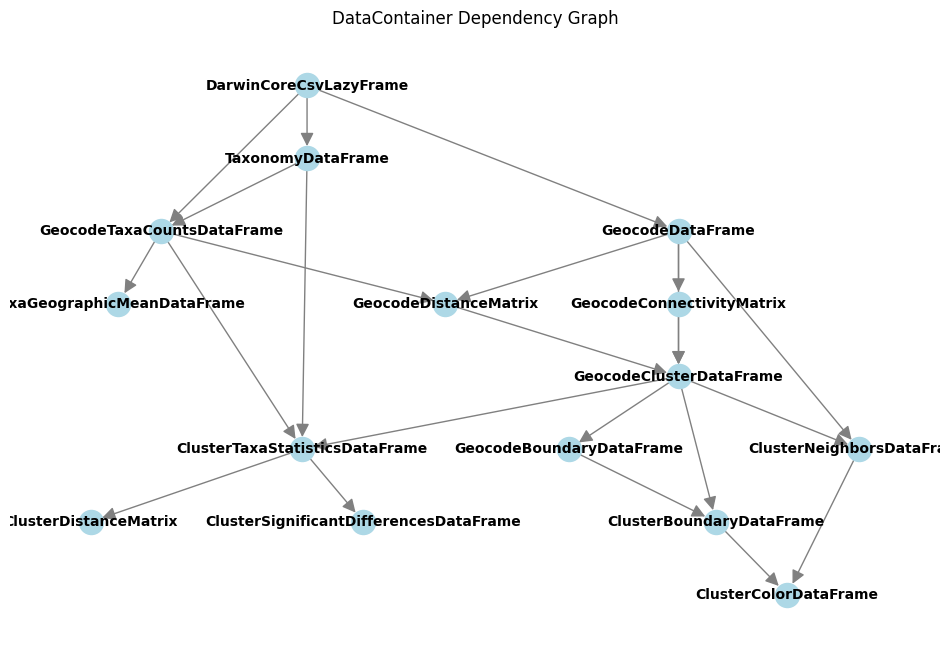

In [3]:
from src.dependency_graph import plot_dependency_graph

plot_dependency_graph()

## `DarwinCoreCsvLazyFrame`

### Build

In [4]:
from src.lazyframes.darwin_core_csv import DarwinCoreCsvLazyFrame

darwin_core_csv_lazy_frame = DarwinCoreCsvLazyFrame.build(input_file, taxon_filter=taxon_filter)

### Preview

In [5]:
darwin_core_csv_lazy_frame.lf.limit(3).collect()

gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
str,str,str,enum,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,u64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""4424226317""","""50c9509d-22c7-4a22-a47d-8c4842…","""https://www.inaturalist.org/ob…","""Animalia""","""Arthropoda""","""Insecta""","""Odonata""","""Libellulidae""","""Sympetrum""",null,null,"""GENUS""","""Sympetrum Newman, 1833""","""Sympetrum""",null,"""US""",null,"""New York""","""PRESENT""",null,"""28eb1a3f-1c15-4a95-931a-4af90e…",42.96266,-76.740947,"""2191.0""",null,null,null,null,null,"""2019-09-06T10:30""","""6""","""9""","""2019""",1428195,null,"""HUMAN_OBSERVATION""","""iNaturalist""","""Observations""","""32505913""",null,"""Amy Guala""","""2019-09-11T01:33:07""","""CC_BY_NC_4_0""","""Amy Guala""","""Amy Guala""",null,null,"""2024-12-03T00:52:33.467Z""","""StillImage""","""COORDINATE_ROUNDED;CONTINENT_D…"
"""2423028148""","""50c9509d-22c7-4a22-a47d-8c4842…","""https://www.inaturalist.org/ob…","""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Geometridae""","""Nematocampa""","""Nematocampa resistaria""",null,"""SPECIES""","""Nematocampa resistaria (Herric…","""Nematocampa resistaria""",null,"""US""",null,"""Vermont""","""PRESENT""",null,"""28eb1a3f-1c15-4a95-931a-4af90e…",43.822608,-72.641412,"""5.0""",null,null,null,null,null,"""2019-09-11T22:08:52""","""11""","""9""","""2019""",1991012,"""1991012""","""HUMAN_OBSERVATION""","""iNaturalist""","""Observations""","""32566956""",null,"""bugguytad""","""2019-09-12T02:25:38""","""CC_BY_NC_4_0""","""bugguytad""","""bugguytad""",null,null,"""2024-12-03T01:38:46.617Z""","""StillImage;StillImage;StillIma…","""COORDINATE_ROUNDED;CONTINENT_D…"
"""2423041120""","""50c9509d-22c7-4a22-a47d-8c4842…","""https://www.inaturalist.org/ob…","""Animalia""","""Arthropoda""","""Insecta""","""Odonata""","""Coenagrionidae""","""Argia""","""Argia moesta""",null,"""SPECIES""","""Argia moesta (Hagen, 1861)""","""Argia moesta""",null,"""US""",null,"""Texas""","""PRESENT""",null,"""28eb1a3f-1c15-4a95-931a-4af90e…",30.99463,-103.662658,null,null,null,null,null,null,"""2019-09-08T09:01""","""8""","""9""","""2019""",5051399,"""5051399""","""HUMAN_OBSERVATION""","""iNaturalist""","""Observations""","""32612673""",null,"""Todd Fitzgerald""","""2019-09-12T22:11:30""","""CC_BY_NC_4_0""","""Todd Fitzgerald""","""Todd Fitzgerald""",null,null,"""2024-12-03T01:38:10.816Z""","""StillImage""","""COORDINATE_ROUNDED;CONTINENT_D…"


## `GeohashDataFrame`

### Build

In [6]:
from src.dataframes.geocode import GeocodeDataFrame

geocode_dataframe = GeocodeDataFrame.build(
    darwin_core_csv_lazy_frame,
    geocode_precision,
)

### Preview

In [7]:
geocode_dataframe.df

geocode,center,direct_neighbors,direct_and_indirect_neighbors
str,struct[2],list[str],list[str]
"""840e491ffffffff""","{49.369298,-67.913007}","[""840e497ffffffff"", ""840e493ffffffff"", ""840e49bffffffff""]","[""840e497ffffffff"", ""840e493ffffffff"", ""840e49bffffffff""]"
"""840e493ffffffff""","{48.946311,-67.83016}","[""840e49bffffffff"", ""840e491ffffffff"", … ""842b14dffffffff""]","[""840e49bffffffff"", ""840e491ffffffff"", … ""842b14dffffffff""]"
"""840e497ffffffff""","{49.104076,-68.442117}","[""840e491ffffffff"", ""840e4bbffffffff"", … ""840e493ffffffff""]","[""840e491ffffffff"", ""840e4bbffffffff"", … ""840e493ffffffff""]"
"""840e49bffffffff""","{49.208357,-67.299825}","[""840e491ffffffff"", ""840e493ffffffff"", … ""842b327ffffffff""]","[""840e491ffffffff"", ""840e493ffffffff"", … ""842b327ffffffff""]"
"""840e4b1ffffffff""","{49.410776,-69.681628}","[""840e4b7ffffffff"", ""840e4b3ffffffff"", ""840e4bbffffffff""]","[""840e4b7ffffffff"", ""840e4b3ffffffff"", ""840e4bbffffffff""]"
…,…,…,…
"""844da39ffffffff""","{29.518714,-68.472339}",[],"[""844db1bffffffff""]"
"""844db1bffffffff""","{29.95183,-70.105581}",[],"[""844d86dffffffff"", ""842a5b3ffffffff"", ""844da39ffffffff""]"
"""844db61ffffffff""","{31.586253,-71.677466}",[],"[""842acc9ffffffff"", ""844d86dffffffff""]"


## `TaxonomyDataFrame`

### Build

In [8]:
from src.dataframes.taxonomy import TaxonomyDataFrame

taxonomy_dataframe = TaxonomyDataFrame.build(darwin_core_csv_lazy_frame)

### Preview

In [9]:
taxonomy_dataframe.df

taxonId,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName
u32,enum,str,str,str,str,str,str,str,str
0,"""Animalia""","""Arthropoda""","""Insecta""","""Coleoptera""","""Bostrichidae""","""Endecatomus""","""Endecatomus dorsalis""","""SPECIES""","""Endecatomus dorsalis Mellié, 1…"
1,"""Animalia""","""Arthropoda""","""Insecta""","""Hemiptera""","""Alydidae""","""Hyalymenus""","""Hyalymenus subinermis""","""SPECIES""","""Hyalymenus subinermis Van Duze…"
2,"""Animalia""","""Arthropoda""","""Insecta""","""Coleoptera""","""Curculionidae""","""Centrinites""","""Centrinites strigicollis""","""SPECIES""","""Centrinites strigicollis T.L.C…"
3,"""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Geometridae""","""Chloraspilates""","""Chloraspilates bicoloraria""","""SPECIES""","""Numia bicoloraria (Packard, 18…"
4,"""Animalia""","""Arthropoda""","""Insecta""","""Coleoptera""","""Nitidulidae""","""Carpophilus""","""Carpophilus marginatus""","""SPECIES""","""Carpophilus marginatus Erichso…"
…,…,…,…,…,…,…,…,…,…
37926,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Megachilidae""","""Megachile""","""Megachile casadae""","""SPECIES""","""Megachile casadae Cockerell, 1…"
37927,"""Animalia""","""Arthropoda""","""Insecta""","""Coleoptera""","""Tenebrionidae""","""Apsida""","""Apsida belti""","""SPECIES""","""Apsida belti Bates, 1873"""
37928,"""Animalia""","""Arthropoda""","""Insecta""","""Hemiptera""","""Cicadellidae""","""Carsonus""","""Carsonus aridus""","""SPECIES""","""Carsonus aridus (Ball, 1909)"""


## `GeohashSpeciesCountsDataFrame`

### Build

In [10]:
from src.dataframes.geocode_taxa_counts import GeocodeTaxaCountsDataFrame

geocode_taxa_counts_dataframe = GeocodeTaxaCountsDataFrame.build(
    darwin_core_csv_lazy_frame,
    geocode_precision,
    taxonomy_dataframe,
)

### Preview

In [11]:
geocode_taxa_counts_dataframe.df

geocode,taxonId,count
str,u32,u32
"""840e491ffffffff""",17579,1
"""840e491ffffffff""",18417,1
"""840e491ffffffff""",23852,1
"""840e491ffffffff""",29010,1
"""840e491ffffffff""",8287,1
…,…,…
"""844da39ffffffff""",19800,1
"""844db1bffffffff""",26773,1
"""844db61ffffffff""",29273,1


## `GeocodeConnectivityMatrix`

### Build

In [12]:
from src.matrices.geocode_connectivity import GeocodeConnectivityMatrix

geocode_connectivity_matrix = GeocodeConnectivityMatrix.build(geocode_dataframe)

### Shape

In [13]:
geocode_connectivity_matrix._connectivity_matrix.shape

(6061, 6061)

### Preview

In [14]:
geocode_connectivity_matrix._connectivity_matrix

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

## `GeocodeDistanceMatrix`

In [15]:
from src.matrices.geocode_distance import GeocodeDistanceMatrix

print(GeocodeDistanceMatrix.__doc__)


    A distance matrix where each column and row is a geocode, and the cell at the intersection of a
    column and row is the similarity (or distance) between the two geocodes. Internally it is stored
    as a condensed distance matrix, which is a one-dimensional array containing the upper triangular
    part of the distance matrix.
    


### Build

In [16]:
geocode_distance_matrix = GeocodeDistanceMatrix.build(
    geocode_taxa_counts_dataframe,
    geocode_dataframe,
)

/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Shape

In [17]:
geocode_distance_matrix.squareform().shape

(6061, 6061)

### Preview

In [18]:
geocode_distance_matrix.squareform()

array([[0.        , 0.00100541, 0.00082225, ..., 0.00146296, 0.00156923,
        0.00167917],
       [0.00100541, 0.        , 0.00179949, ..., 0.00074413, 0.00067036,
        0.00072308],
       [0.00082225, 0.00179949, 0.        , ..., 0.00220585, 0.0023493 ,
        0.00243774],
       ...,
       [0.00146296, 0.00074413, 0.00220585, ..., 0.        , 0.00050644,
        0.00076484],
       [0.00156923, 0.00067036, 0.0023493 , ..., 0.00050644, 0.        ,
        0.00048686],
       [0.00167917, 0.00072308, 0.00243774, ..., 0.00076484, 0.00048686,
        0.        ]])

## `GeohashClusterDataFrame`

### Build

In [19]:
from src.dataframes.geocode_cluster import GeocodeClusterDataFrame

geocode_cluster_dataframe = GeocodeClusterDataFrame.build(
    geocode_dataframe,
    geocode_distance_matrix,
    geocode_connectivity_matrix,
    num_clusters,
)

### Preview

In [20]:
geocode_cluster_dataframe.df.limit(3)

geocode,cluster
str,u32
"""840e491ffffffff""",2
"""840e493ffffffff""",2
"""840e497ffffffff""",2


In [21]:
# # TMP

# from src.dataframes.geocode_cluster import GeocodeClusterDataFrame
# from sklearn.metrics import silhouette_score

# results = []

# for i in range(2, 200):
#     geocode_cluster_dataframe = GeocodeClusterDataFrame.build(
#         geocode_dataframe,
#         distance_matrix,
#         connectivity_matrix,
#         num_clusters=i,
#     )
#     score = silhouette_score(
#         X=distance_matrix.squareform(),
#         labels=geocode_cluster_dataframe.df["cluster"],
#         metric="precomputed",
#     )
#     print(f"{i}: {score}")
#     results.append((i, score))

# results

## `ClusterNeighborsDataframe`

### Build

In [22]:
from src.dataframes.cluster_neighbors import ClusterNeighborsDataFrame

cluster_neighbors_dataframe = ClusterNeighborsDataFrame.build(
    geocode_dataframe,
    geocode_cluster_dataframe,
)

### Preview

In [23]:
cluster_neighbors_dataframe.df

cluster,direct_neighbors,direct_and_indirect_neighbors
u32,list[u32],list[u32]
0,"[58, 4]","[58, 59, 4]"
1,"[7, 9, … 27]","[7, 9, … 27]"
2,"[35, 3, … 28]","[35, 3, … 28]"
3,"[2, 6, … 28]","[2, 6, … 28]"
4,"[0, 26, … 11]","[0, 26, … 11]"
…,…,…
55,[29],"[12, 29]"
56,[2],[2]
57,[11],[11]


## `ClusterTaxaStatisticsDataFrame`

### Build

In [24]:
from src.dataframes.cluster_taxa_statistics import ClusterTaxaStatisticsDataFrame

cluster_taxa_statistics_dataframe = ClusterTaxaStatisticsDataFrame.build(
    geocode_taxa_counts_dataframe,
    geocode_cluster_dataframe,
    taxonomy_dataframe,
)

### Preview

In [25]:
cluster_taxa_statistics_dataframe.df

cluster,taxonId,count,average
u32,u32,u32,f64
null,28073,143,0.000011
null,6958,141,0.000011
null,29636,4,3.2092e-7
null,17054,2,1.6046e-7
null,35424,1,8.0231e-8
…,…,…,…
2,20238,18,0.000041
35,17029,4,0.000991
17,15380,18,0.000012


## `ClusterSignificantDifferencesDataFrame`

### Build

In [26]:
from src.dataframes.cluster_significant_differences import (
    ClusterSignificantDifferencesDataFrame,
)

cluster_significant_differences_dataframe = (
    ClusterSignificantDifferencesDataFrame.build(
        cluster_taxa_statistics_dataframe,
    )
)

### Preview

In [27]:
cluster_significant_differences_dataframe.df.limit(3)

cluster,taxonId,percentage_difference
u32,u32,f64
0,19800,5267.98998
0,32264,692.196627
0,11495,73.526146


## `GeocodeBoundaryDataFrame`

### Build

In [28]:
from src.dataframes.geocode_boundary import GeocodeBoundaryDataFrame

geocode_boundary_dataframe = GeocodeBoundaryDataFrame.build(
    geocode_cluster_dataframe,
)

### Preview

In [29]:
geocode_boundary_dataframe.df

geocode,boundary
str,binary
"""840e491ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x116L$\xd0\xf0P\xc0E(\xdb\x0f\x9f\xccH@\xcbY\xae\xf4m\x09Q\xc0\x7f\xb1\x1db$\xc8H@\xac\x17\xa5\xb4\xe9\x12Q\xc0\xbe\\xddY\xb9\xaaH""…"
"""840e493ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x0a\xcc\xdc\x8b\x94\xebP\xc0\xf1\xb7\xad\xfea\x96H@g\x13M)\xf3\x03Q\xc0\xa1\xec\xeb\xef\xee\x91H@Z\xd7t\xe1]\x0dQ\xc0Ymw\xd5\x9ctH""…"
"""840e497ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\xac\x17\xa5\xb4\xe9\x12Q\xc0\xbe\\xddY\xb9\xaaH@H\xab\xf9*^+Q\xc0\x12\xa9\xf8\xbb\x03\xa6H@\xc6\xe6\x87q\x9d4Q\xc0\xe7\x80zj\x8c\x88H""…"
"""840e49bffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\xd3y|Og\xc9P\xc0r[\xca\xdf\xde\xb7H@s\x85\xe4\xb9\xed\xe1P\xc0\x86\xfcJ\x04\xa7\xb3H@\x0a\xcc\xdc\x8b\x94\xebP\xc0\xf1\xb7\xad\xfea\x96H""…"
"""840e4b1ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\xef\x12L\xbf\x97bQ\xc0\xdd\x11k\x94D\xd2H@\xc3c\xe6\xe23{Q\xc0\xc6\xf8a$\x07\xcdH@\x9a^\xf5&\x18\x84Q\xc0\xbc\x8d)\x96G\xafH""…"
…,…
"""844da39ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x17u\x9f]\x15\x18Q\xc0ws|5?\xb2=@\xa0/\x1e?\x1f(Q\xc0}\x829$\x9c\xa9=@\xc1\xb8.\xc15.Q\xc0\x11\x88\x1c\xcf\x1f|=""…"
"""844db1bffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00O6\xe7\xc1\xea\x80Q\xc0\xbeJt\xd9\xe9!>@\x9b\xde\xdc\xf4\x15\x91Q\xc0Q2\xed\xfdi\x18>@\xd8\xcf\x06z\xdd\x96Q\xc0d\x05\xed\xa0%\xea=""…"
"""844db61ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\xb9E\xd1\xc2\xaf\xe5Q\xc0\xad\xb2^\xa2-\xc6?@\xc5\xf1\xafR_\xf6Q\xc0V0!\xe5\xa3\xbb?@l\xe5\xef5\xfa\xfbQ\xc0\x15\x0d\xe5:\x86\x8b?""…"


## `ClusterBoundaryDataFrame`

### Build

In [30]:
from src.dataframes.cluster_boundary import ClusterBoundaryDataFrame

cluster_boundary_dataframe = ClusterBoundaryDataFrame.build(
    geocode_cluster_dataframe,
    geocode_boundary_dataframe,
)

### Preview

In [31]:
cluster_boundary_dataframe.df

cluster,boundary
u32,binary
0,"b""\x01\x06\x00\x00\x00\x0b\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0f\x00\x00\x00\x97rF\xf4\xcd\xb3T\xc0\x12A\x06\x86}H6@)c\x14\x9bQ\xa6T\xc0\xfb:\x7f\x98\xf6d6@ky\x89\xe9\xd4\x99""…"
1,"b""\x01\x03\x00\x00\x00\x03\x00\x00\x00\x87\x01\x00\x00\x85\xbf\x90z\xc3\xe4[\xc0\xa8N\x9e\x94\xfc*@@\xa4\xe2\x90\xc9\xbc\xd5[\xc0`\x8aV\xc7{?@@@\xa8#\x9a\xb7\xc3[\xc0\x01x\x91G\xfe3@""…"
2,"b""\x01\x06\x00\x00\x00\x07\x00\x00\x00\x01\x03\x00\x00\x00\x02\x00\x00\x009\x02\x00\x003\x1e\x88\x0f\xd1\x0cW\xc0\xc8,z/#\xd1F@\xfc\x87\xbdc1\x0cW\xc0\x98\x96\xcd\xc5|\xefF@,\x80\xe0\x1ac\x1f""…"
3,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03\x00\x00\x00\x09\x00\x00\x00\xd5\x01\x00\x00\xaa\xdf\x83\x1c\x0a?V\xc0\xe2\K\xa6;\xd7B@c\x11\x91]\xdb.V\xc0\x8b}i\x7fI\xe4B@\x0f{\x03\xa7\xf6\x1e""…"
4,"b""\x01\x06\x00\x00\x00\x07\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\xd3\x00\x00\x00(\xdb\x91\x0a;\xabT\xc0\xda\xb1\xc1e\xe4h8@\xf5\xf4LF\x04\xb8T\xc0\x1f\x91+\x9e\xa6\x898@Md\xaf\xb0\xc9\xc5""…"
…,…
55,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\xc260;\xfd\x9d_\xc0\x04B\xfcq\xc5\xb6F@0\xf4E6\xaa\x8f_\xc0\xb4\x91\xb78\xaf\xccF@\xf4\x8fH\xd7\x0b\x95_\xc0\xf7\xe5$\x9d\xdc\xe6F""…"
56,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00%\x00\x00\x00/D;\xe9g#Q\xc0\xc7\x07\xf6r\x20\xe7G@A\x8b\xba\xb7W\x1aQ\xc0D\xce\x1d\x16I\x04H@)\xe0$Q\x9a\x02Q\xc0\x10j\xb4a\xe5\x08H""…"
57,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0d\x00\x00\x00\x88\x15\xaf\x9e\xb9\xd0U\xc0\xa8\xe2\xa1\x96\xab\xb2<@\x93j\xc5[|\xdfU\xc0V\xa4\xee\xec\xa6\x95<@\xc5\x8a\x9c\xde\xe3\xed""…"


## `ClusterDistanceMatrix`

### Build

In [32]:
from src.matrices.cluster_distance import ClusterDistanceMatrix

cluster_distance_matrix = ClusterDistanceMatrix.build(
    cluster_taxa_statistics_dataframe,
)

### Preview

In [33]:
cluster_distance_matrix.squareform()

array([[0.        , 0.9119869 , 0.57496436, ..., 1.00000774, 1.00000774,
        1.00000774],
       [0.9119869 , 0.        , 0.81435329, ..., 1.00000648, 1.00000648,
        1.00000648],
       [0.57496436, 0.81435329, 0.        , ..., 1.00000077, 1.00000077,
        1.00000077],
       ...,
       [1.00000774, 1.00000648, 1.00000077, ..., 0.        , 0.        ,
        0.        ],
       [1.00000774, 1.00000648, 1.00000077, ..., 0.        , 0.        ,
        0.        ],
       [1.00000774, 1.00000648, 1.00000077, ..., 0.        , 0.        ,
        0.        ]])

## `ClusterColorDataFrame`

### Build

In [34]:
from src.dataframes.cluster_color import ClusterColorDataFrame

cluster_colors_dataframe = ClusterColorDataFrame.build(
    cluster_neighbors_dataframe,
    cluster_boundary_dataframe,
    cluster_taxa_statistics_dataframe,
    color_method="taxonomic",
    # color_method="geographic",
)

/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Preview

In [35]:
cluster_colors_dataframe.df

cluster,color
u32,str
17,"""#e0cf51"""
9,"""#a1e74b"""
1,"""#9edd50"""
23,"""#eed45d"""
0,"""#b9d64a"""
…,…
51,"""#b60620"""
30,"""#b20129"""
58,"""#b7040c"""


## `GeocodeSilhouetteScoreDataFrame`

### Build

In [36]:
from src.dataframes.geocode_silhouette_score import GeocodeSilhouetteScoreDataFrame

geocode_silhouette_score_dataframe = GeocodeSilhouetteScoreDataFrame.build(
    cluster_neighbors_dataframe,
    geocode_distance_matrix,
    geocode_cluster_dataframe,
)

### Preview

In [37]:
geocode_silhouette_score_dataframe.df.sort(by="silhouette_score")

geocode,silhouette_score
str,f64
"""84484d7ffffffff""",-0.986241
"""84458b3ffffffff""",-0.984545
"""8448485ffffffff""",-0.982537
"""844463bffffffff""",-0.972676
"""8444143ffffffff""",-0.970528
…,…
"""84489e1ffffffff""",0.601621
"""84489e7ffffffff""",0.602933
"""8426ca3ffffffff""",0.604029


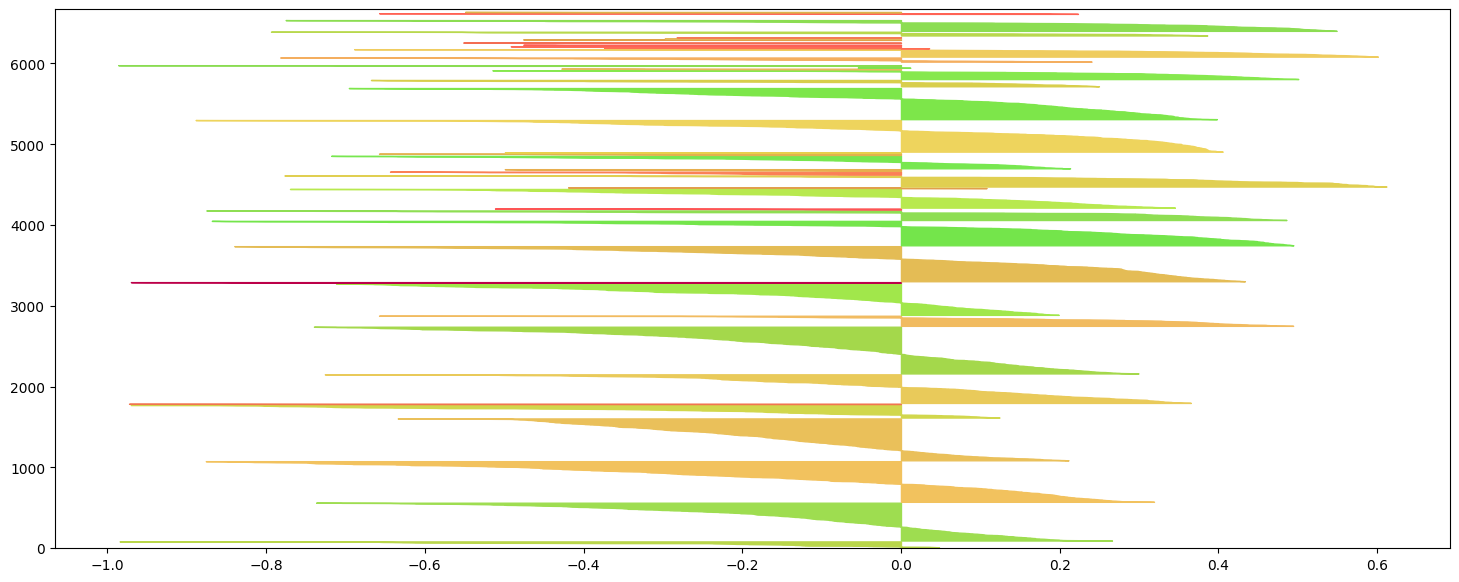

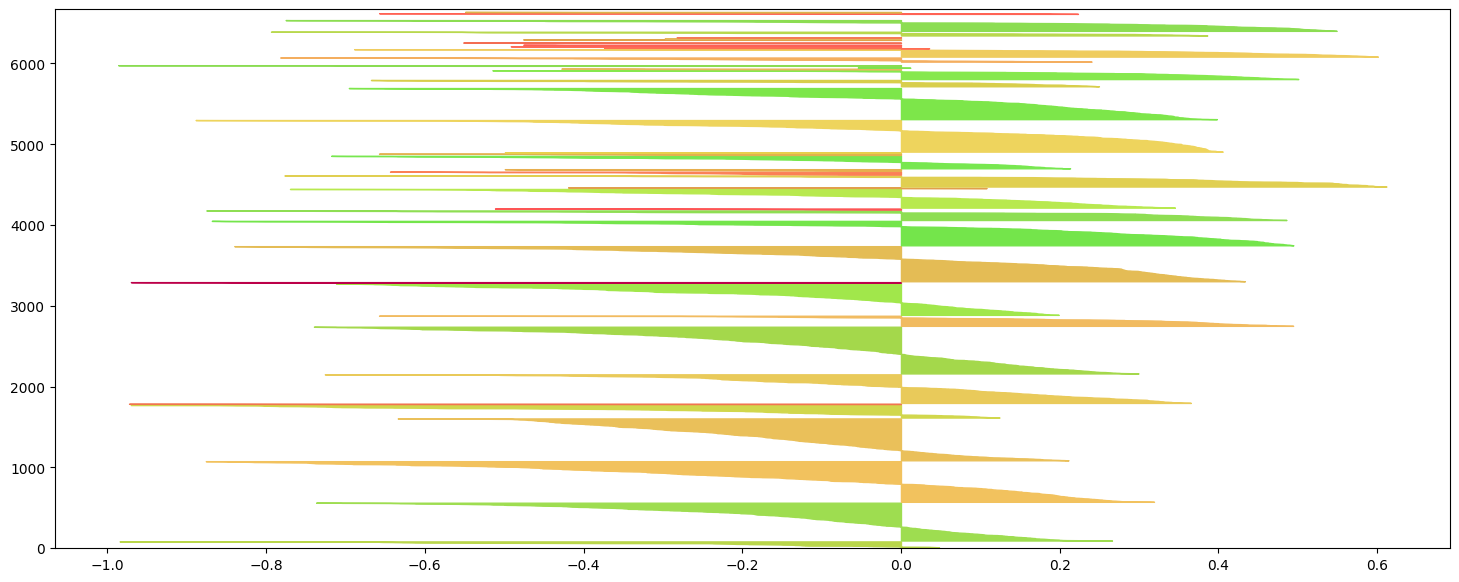

In [38]:
from src.plot.silhouette_score import plot_silhouette_scores

plot_silhouette_scores(
    geocode_cluster_dataframe,
    geocode_distance_matrix,
    geocode_silhouette_score_dataframe,
    cluster_colors_dataframe,
)

## Build and plot GeoJSON feature collection

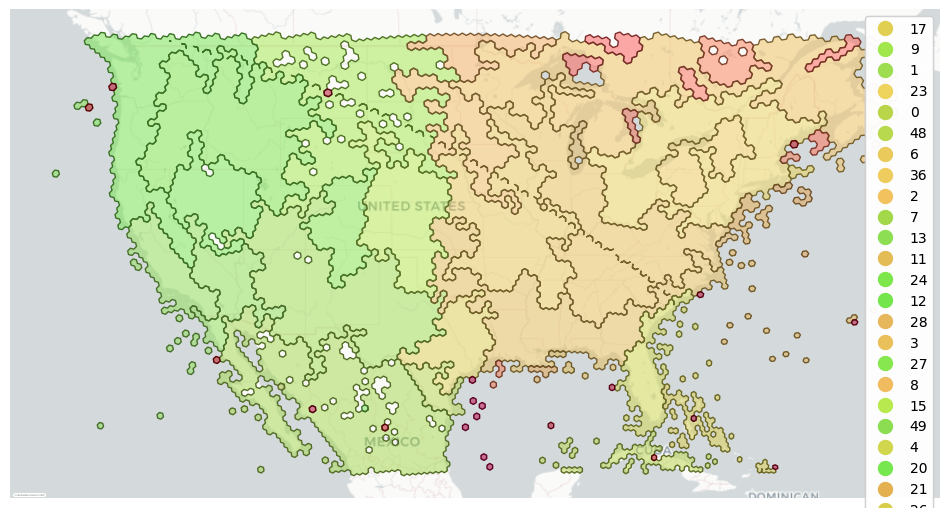

In [39]:
from src.geojson import build_geojson_feature_collection, write_geojson
from src.render import plot_clusters
from src import output
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [12, 7]

feature_collection = build_geojson_feature_collection(
    cluster_boundary_dataframe,
    cluster_colors_dataframe,
)

write_geojson(feature_collection, output.get_geojson_path())
plot_clusters(feature_collection)

## Build and display HTML output

In [41]:
from src.html_output import prepare_full_report_data, render_html, write_html

report_data = prepare_full_report_data(
    cluster_colors_dataframe,
    cluster_significant_differences_dataframe,
    taxonomy_dataframe,
    feature_collection,
)
html_content = render_html("cluster_report.html", report_data)
write_html(html_content, "output.html")

## Dimensionality reduction plot

/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: >

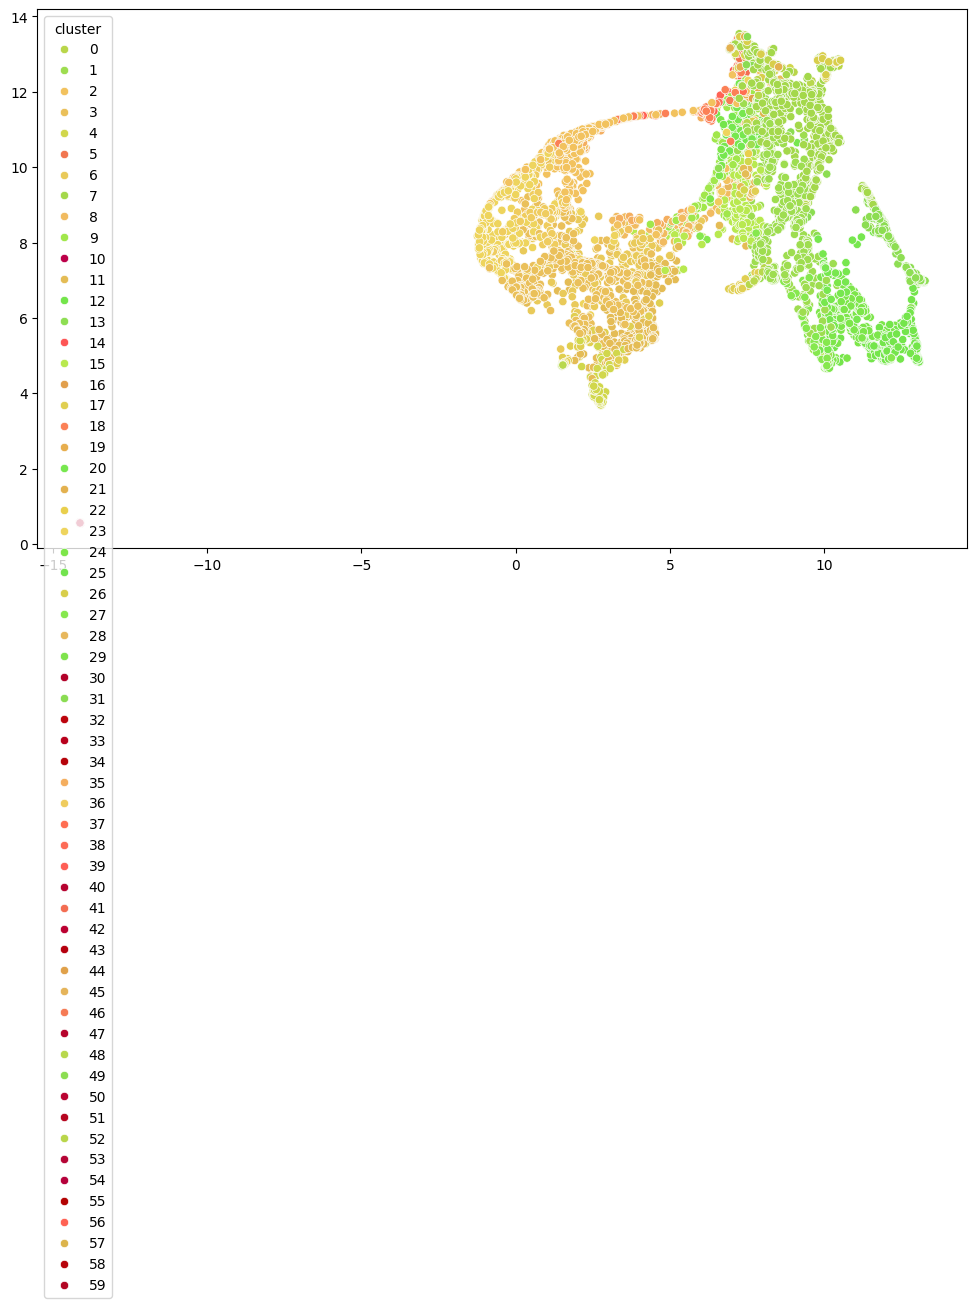

In [42]:
from src.plot.dimnesionality_reduction import create_dimensionality_reduction_plot

create_dimensionality_reduction_plot(
    geocode_distance_matrix,
    geocode_cluster_dataframe,
    cluster_colors_dataframe,
    method="umap",
)


## Clustermap visualization

In [44]:
ordered_geocodes = geocode_dataframe.df["geocode"].unique()

col_colors = []
for geocode in ordered_geocodes:
    cluster = geocode_cluster_dataframe.cluster_for_geocode(geocode)
    col_colors.append(cluster_colors_dataframe.get_color_for_cluster(cluster))

In [45]:
import seaborn as sns
import polars as pl
from scipy.cluster.hierarchy import linkage


linkage_array = linkage(geocode_distance_matrix.condensed(), "ward")

def min_max_normalize(series: pl.Series) -> pl.Series:
    return (series - series.min()) / (series.max() - series.min())

In [51]:
joined = cluster_significant_differences_dataframe.df.join(
    taxonomy_dataframe.df, on=["taxonId"], how="left"
)

joined

cluster,taxonId,percentage_difference,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName
u32,u32,f64,enum,str,str,str,str,str,str,str,str
0,19800,5267.98998,"""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Nymphalidae""","""Anartia""","""Anartia jatrophae""","""SPECIES""","""Anartia jatrophae (Linnaeus, 1…"
0,32264,692.196627,"""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Nymphalidae""","""Dione""","""Dione vanillae""","""SPECIES""","""Dione vanillae (Linnaeus, 1758…"
0,11495,73.526146,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Apidae""","""Apis""","""Apis mellifera""","""SPECIES""","""Apis mellifera Linnaeus, 1758"""
0,20692,12222.75618,"""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Nymphalidae""","""Dryas""","""Dryas iulia""","""SPECIES""","""Dryas iulia (Fabricius, 1775)"""
0,20149,3352.835891,"""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Nymphalidae""","""Heliconius""","""Heliconius charithonia""","""SPECIES""","""Heliconius charithonia (Linnae…"
…,…,…,…,…,…,…,…,…,…,…,…
57,16806,107348.75,"""Animalia""","""Arthropoda""","""Insecta""","""Hemiptera""","""Cicadidae""","""Diceroprocta""","""Diceroprocta viridifascia""","""SPECIES""","""Diceroprocta viridifascia (Wal…"
57,25873,3358.778721,"""Animalia""","""Arthropoda""","""Insecta""","""Orthoptera""","""Acrididae""","""Schistocerca""","""Schistocerca americana""","""SPECIES""","""Schistocerca americana (Drury,…"
57,6914,17386.04798,"""Animalia""","""Arthropoda""","""Insecta""","""Orthoptera""","""Acrididae""","""Trimerotropis""","""Trimerotropis maritima""","""SPECIES""","""Trimerotropis maritima (Harris…"


In [61]:
import seaborn as sns
import polars as pl


data = {}
for species, taxonId in (
    joined.select("scientificName", "taxonId").unique().limit(3).iter_rows()
):
    counts = []

    for geocode in ordered_geocodes:
        geocode_counts_species = (
            geocode_taxa_counts_dataframe.df.lazy()
            .filter(pl.col("geocode") == geocode, pl.col("taxonId") == taxonId)
            .select("count")
            .sum()
            .collect().item()
        )
        geocode_counts_all = (
            geocode_taxa_counts_dataframe.df.lazy()
            .filter(pl.col("geocode") == geocode)
            .select("count")
            .sum()
            .collect().item()
        )
        geocode_average = geocode_counts_species / geocode_counts_all
        all_average = (
            cluster_taxa_statistics_dataframe.df.filter(
                pl.col("taxonId") == taxonId,
                pl.col("cluster").is_null(),
            )
            .get_column("average")
            .item()
        )
        counts.append(geocode_average - all_average)
    counts = pl.Series(
        values=counts,
        name=species,
    )
    # counts = counts / counts.max()
    # counts = counts.pow(1 / 3)
    data[species] = min_max_normalize(counts)

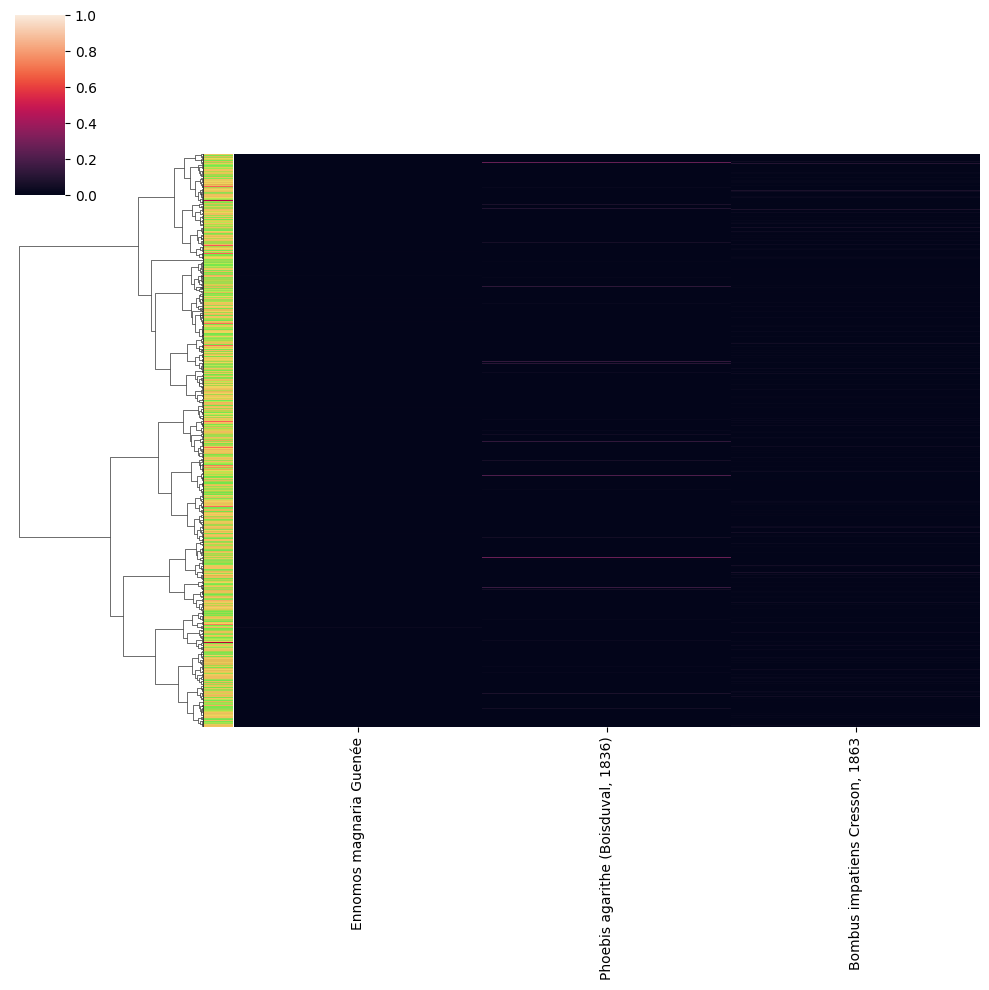

In [62]:
dataframe = pl.DataFrame(data=data)
sns.clustermap(
    data=dataframe,
    col_cluster=False,
    row_cluster=True,
    row_linkage=linkage_array,
    row_colors=col_colors,
    xticklabels=dataframe.columns,
    yticklabels=False,
)